In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
k1 = -8.575413703918457
k2 = 1.1488711833953857
k3 = 0.00020718970336019993
k4 = 8.830842971801758
k5 = 0.0114692198112607
k6 = 0.012592687271535397
t1 = 90.0
p1 = 89.91336059570312
t2 = 12.000863075256348
p2 = 0.0

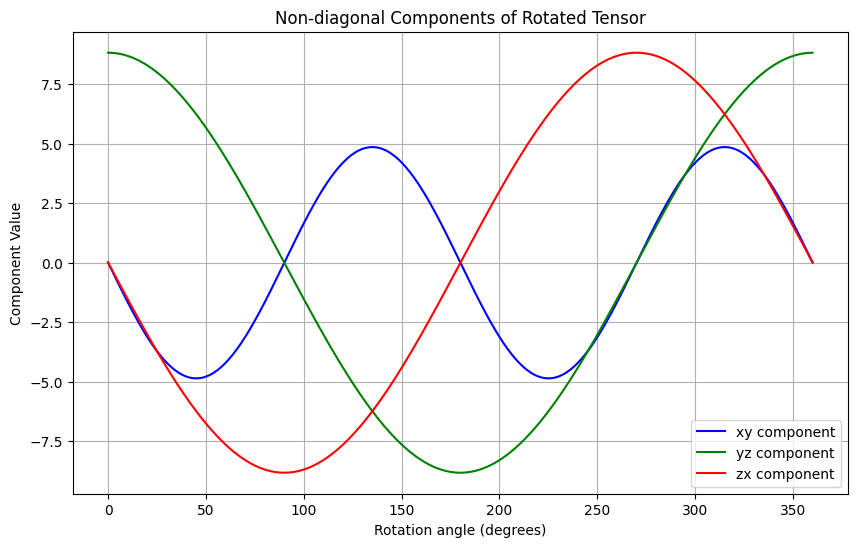

xy成分 と zx成分 が同時に 0 となる角度 (度): [0.0, 180.0, 360.0]


In [21]:
# 固定の回転軸
n1, n2, n3 = 0, 0, 1

# テンソル sv の初期値
sv = np.array([[k1,k6,k5],[k6,k2,k4],[k5,k4,k3]])

# 回転角度 x の範囲を 0 ~ 360 度とする
angles = np.linspace(0, 360, 361)
xy_values, yz_values, zx_values = [], [], []
zero_angle_results = []  # 条件を満たす角度を保存するリスト

# 許容範囲を拡大 (精度を調整可能)
tolerance = 1e-1

# 各角度に対して非対角成分 (xy, yz, zx) を計算
for x in angles:
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    
    T = np.array([[n1**2 * (1 - C) + C, n1 * n2 * (1 - C) - n3 * S, n1 * n3 * (1 - C) + n2 * S], 
                  [n1 * n2 * (1 - C) + n3 * S, n2**2 * (1 - C) + C, n2 * n3 * (1 - C) - n1 * S], 
                  [n1 * n3 * (1 - C) - n2 * S, n2 * n3 * (1 - C) + n1 * S, n3**2 * (1 - C) + C]])

    # 回転後のテンソル
    h = T @ sv @ T.T

    # 非対角成分を抽出
    xy_values.append(h[0, 1])
    yz_values.append(h[1, 2])
    zx_values.append(h[2, 0])

    # h[0,1] と h[2,0] が許容範囲内で 0 に近いときの x を保存
    if np.isclose(h[0, 1], 0, atol=tolerance) and np.isclose(h[2, 0], 0, atol=tolerance):
        zero_angle_results.append(x)

# グラフを作成
plt.figure(figsize=(10, 6))
plt.plot(angles, xy_values, label="xy component", color='blue')
plt.plot(angles, yz_values, label="yz component", color='green')
plt.plot(angles, zx_values, label="zx component", color='red')

plt.title("Non-diagonal Components of Rotated Tensor")
plt.xlabel("Rotation angle (degrees)")
plt.ylabel("Component Value")
plt.legend()
plt.grid()
plt.show()

# 条件を満たす角度を表示
print("xy成分 と zx成分 が同時に 0 となる角度 (度):", zero_angle_results)

In [22]:
f0 = zero_angle_results[0]
f1 = zero_angle_results[1]
print(f0)
print(f1)

0.0
180.0


In [23]:
n1,n2,n3 = 0,0,1

C = np.cos(np.radians(f0))
S = np.sin(np.radians(f0))

T = np.array([[n1**(2)*(1-C)+C, n1*n2*(1-C)-n3*S, n1*n3*(1-C)+n2*S], 
            [n1*n2*(1-C)+n3*S, n2**(2)*(1-C)+C, n2*n3*(1-C)-n1*S], 
            [n1*n3*(1-C)-n2*S, n2*n3*(1-C)+n1*S, n3**(2)*(1-C)+C]])

sv = np.array([[k1,k6,k5],[k6,k2,k4],[k5,k4,k3]])

h0 = T @ sv @ T.T

print("ナイトシフトテンソル:",h0)

ナイトシフトテンソル: [[-8.57541370e+00  1.25926873e-02  1.14692198e-02]
 [ 1.25926873e-02  1.14887118e+00  8.83084297e+00]
 [ 1.14692198e-02  8.83084297e+00  2.07189703e-04]]


In [24]:
n1,n2,n3 = 0,0,1

C = np.cos(np.radians(f1))
S = np.sin(np.radians(f1))

T = np.array([[n1**(2)*(1-C)+C, n1*n2*(1-C)-n3*S, n1*n3*(1-C)+n2*S], 
            [n1*n2*(1-C)+n3*S, n2**(2)*(1-C)+C, n2*n3*(1-C)-n1*S], 
            [n1*n3*(1-C)-n2*S, n2*n3*(1-C)+n1*S, n3**(2)*(1-C)+C]])

sv = np.array([[k1,k6,k5],[k6,k2,k4],[k5,k4,k3]])

h1 = T @ sv @ T.T

print("ナイトシフトテンソル:",h1)

ナイトシフトテンソル: [[-8.57541370e+00  1.25926873e-02 -1.14692198e-02]
 [ 1.25926873e-02  1.14887118e+00 -8.83084297e+00]
 [-1.14692198e-02 -8.83084297e+00  2.07189703e-04]]


In [25]:
def rotation_matrix(n, theta):
    """
    Compute the Rodrigues rotation matrix for a given axis n and angle theta.

    Parameters:
        n (ndarray): rotaion axis (normalized).
        theta (float): rotation angle in radian.

    Returns:
        - (ndarray) -- 3x3 rotation matrix.
    """
    K = np.array([[0.0, -n[2], n[1]], [n[2], 0.0, -n[0]], [-n[1], n[0], 0.0]])
    I = np.eye(3)
    R = I + np.sin(theta) * K + (1.0 - np.cos(theta)) * np.dot(K, K)
    return R


def create_shift_tensor(ks, Rs):
    """
    Create shift tensors for all sites.

    Args:
        ks (list): components of K, (Kxx, Kyy, Kzz, Kyz, Kzx, Kxy).
        Rs (list): symmetry operations for each site.

    Returns:
        - (list) -- shift tensors in each site.
    """
    k1, k2, k3, k4, k5, k6 = ks
    K = [[k1,k6,k5],[k6,k2,k4],[k5,k4,k3]]
    Ks = [R @ K @ R.T for R in Rs]
    return Ks


def nmr_shift(Ks, h):
    """
    Compute the NMR shift without the contributions from the quadrupolar interactions.

    Args:
        Ks (list): list of 3x3 shift tensors.
        h (ndarray): magnetic field.

    Returns:
        - (list) -- NMR shift for each K.
    """
    shift = [np.diag(h @ K @ h.T) for K in Ks]
    return shift


def compute_shift(n, s, ks, Rs):
    """
    Compute angle dependence of NMR shift.

    Args:
        n (list): rotation axis.
        s (list): starting vector.
        ks (list): components of K, (Kxx, Kyy, Kzz, Kyz, Kzx, Kxy).
        Rs (list): symmetry operations for each site.

    Returns:
        - (ndarray) -- angles.
        - (list) -- angle dependence of NMR shift around n axis.
        - (list) -- angle dependence of NMR shift around nxs axis.
    """
    theta = np.radians(range(181))

    n = np.array(n)
    n1 = n / np.linalg.norm(n)
    s = np.array(s)
    s = s / np.linalg.norm(s)
    n2 = np.cross(n1, s)
    h1 = np.array([rotation_matrix(n1, t) @ s for t in theta])
    h2 = np.array([rotation_matrix(n2, t) @ s for t in theta])

    Ks = create_shift_tensor(ks, Rs)

    shift1 = nmr_shift(Ks, h1)
    shift2 = nmr_shift(Ks, h2)

    return theta, shift1, shift2


def plot_data(theta, shift1, shift2):
    """
    Plot angle dependences.

    Args:
        theta (ndarray): angles.
        shift1 (list): angle dependence of NMR shift around n axis.
        shift2 (list): angle dependence of NMR shift around nxs axis.
    """
    fig, axes = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
    axes.set_title("Knight shift of Te")
    axes.set_xlabel("Rotation angle [deg.]", fontsize=15)
    axes.set_ylabel("Knight shift [%]", fontsize=15)

    axes.set_xlim([0, 90])
    axes.grid()

    n_site = len(shift1)
    colors = ["blue", "green", "red"]
    theta = theta * 180/np.pi
    for site in range(n_site):
        axes.plot(theta, shift1[site]*10000, "-", color=colors[site], label=f'$K_{site+1}$')
    for site in range(n_site):
        axes.plot(theta, shift2[site]*10000, "--", color=colors[site], label=f'$K_{site+1}$')

    axes.legend()

    plt.autoscale(enable=True, axis='y')
    plt.show()

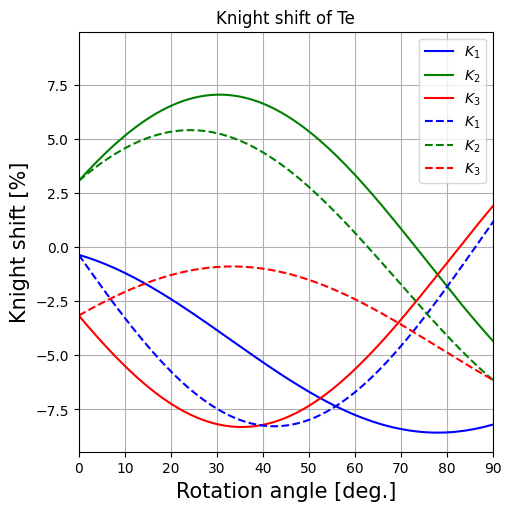

[0.0015121422906754138, 0.9999988567121928, 6.123233995736766e-17]
[0.20792642512536225, 0.0, 0.9781444687440537]


In [26]:
ks = [h0[0,0]*1e-4, h0[1,1]*1e-4, h0[2,2]*1e-4, h0[1,2]*1e-4, h0[0,2]*1e-4, h0[0,1]*1e-4]

E = np.eye(3)
C3 = rotation_matrix([0,0,1], 2.0*np.pi/3.0) # for Te2.
C3i = C3.T # for Te3.

Rs = [E, C3i, C3]

nx = np.cos(np.radians(p1)) * np.sin(np.radians(t1))
ny = np.sin(np.radians(p1)) * np.sin(np.radians(t1))
nz = np.cos(np.radians(t1))
sx = np.cos(np.radians(p2 + f0)) * np.sin(np.radians(t2))
sy = np.sin(np.radians(p2 + f0)) * np.sin(np.radians(t2))
sz = np.cos(np.radians(t2))

n = [nx,ny,nz]
s = [sx,sy,sz]
theta, shift1, shift2 = compute_shift(n, s, ks, Rs)
plot_data(theta, shift1, shift2)
print(n)
print(s)

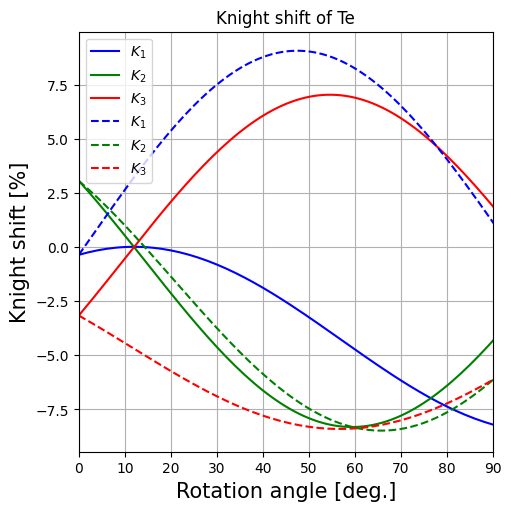

[0.0015121422906754138, 0.9999988567121928, 6.123233995736766e-17]
[-0.20792642512536225, 2.546364309879267e-17, 0.9781444687440537]


In [27]:
ks = [h1[0,0]*1e-4, h1[1,1]*1e-4, h1[2,2]*1e-4, h1[1,2]*1e-4, h1[0,2]*1e-4, h1[0,1]*1e-4]

E = np.eye(3)
C3 = rotation_matrix([0,0,1], 2.0*np.pi/3.0) # for Te2.
C3i = C3.T # for Te3.

Rs = [E, C3i, C3]

nx = np.cos(np.radians(p1)) * np.sin(np.radians(t1))
ny = np.sin(np.radians(p1)) * np.sin(np.radians(t1))
nz = np.cos(np.radians(t1))
sx = np.cos(np.radians(p2 + f1)) * np.sin(np.radians(t2))
sy = np.sin(np.radians(p2 + f1)) * np.sin(np.radians(t2))
sz = np.cos(np.radians(t2))

n = [nx,ny,nz]
s = [sx,sy,sz]
theta, shift1, shift2 = compute_shift(n, s, ks, Rs)
plot_data(theta, shift1, shift2)
print(n)
print(s)